In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pypfopt import EfficientFrontier
import itertools
from scipy.stats import beta
import matplotlib.pyplot as plt

In [128]:
file_path = r"C:\Users\kamod\OneDrive\Escritorio\2024-2 U\Intc Soc\modelos-de-interacciones-sociales--main\trabajo final\Datos\Price_Stocks.xlsx"

retorno_df = pd.read_excel(file_path, sheet_name="Retorno")

In [129]:
n_activos = 12
n_portafolios = 8

In [130]:
retorno_df_clean = retorno_df.dropna()
retorno_df_clean.loc[:, 'Exchange Date'] = pd.to_datetime(retorno_df_clean['Exchange Date'], errors='coerce')
retorno_df_clean = retorno_df_clean.set_index('Exchange Date')
retorno_df_clean = retorno_df_clean.select_dtypes(include=['float64', 'int64'])
#retorno_df_clean = retorno_df_clean*100
# Sort data by Exchange Date in ascending order
retorno_df_clean = retorno_df_clean.sort_index()
df = retorno_df_clean.iloc[:, :n_activos]
fechas = df.index

In [131]:
df

,AAP,AAPL,AXP,AZO,CPB,CSCO,CVX,DUK,DXC,EMR,EQT,FDX
Exchange Date,,,,,,,,,,,,
2010-01-05,-0.005944,0.001729,-0.002199,-0.008353,0.001771,-0.004455,0.007083,-0.016500,-0.000346,0.001615,0.006921,0.013062
2010-01-06,0.008719,-0.015906,0.016165,-0.009380,-0.011200,-0.006509,0.000126,0.003595,0.003638,0.008982,0.003991,-0.008280
2010-01-07,-0.000247,-0.001849,0.011810,0.013270,-0.015201,0.004505,-0.003767,0.004776,-0.010012,0.000000,-0.013472,-0.010854
2010-01-08,0.003953,0.006648,-0.000715,-0.012842,-0.006356,0.005300,0.001765,0.000594,-0.002616,0.005706,-0.008507,0.024840
2010-01-11,-0.009843,-0.008822,-0.011442,0.001288,0.003046,-0.002839,0.017743,0.010095,-0.006119,0.015207,-0.000903,0.026591
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-23,-0.023226,-0.021623,-0.004295,0.007724,-0.008446,-0.005654,-0.002915,0.005756,-0.019062,-0.008860,0.006116,-0.006449
2024-10-24,-0.015059,-0.000823,-0.004609,-0.013546,0.000639,-0.005686,-0.000199,-0.012856,-0.006477,-0.002304,0.021277,0.017982
2024-10-25,-0.014485,0.003643,-0.009741,-0.007069,0.001702,-0.003931,0.002393,-0.015208,-0.003511,-0.001201,0.014069,-0.002749


In [132]:
  # Número de portafolios
pesos = np.random.rand(n_portafolios, n_activos)  # 48 portafolios, 5 activos
pesos = pesos / pesos.sum(axis=1)[:, np.newaxis]  # Normalizamos para que sumen 1

# Multiplicamos los retornos por los pesos para obtener los portafolios
portafolios = np.dot(df.values, pesos.T)

# Paso 3: Crear un DataFrame para los portafolios con los valores calculados
df_portafolios = pd.DataFrame(portafolios, index=df.index, columns=[f'Portafolio_{i+1}' for i in range(n_portafolios)])
df_portafolios

,Portafolio_1,Portafolio_2,Portafolio_3,Portafolio_4,Portafolio_5,Portafolio_6,Portafolio_7,Portafolio_8
Exchange Date,,,,,,,,
2010-01-05,-0.000301,-0.001026,-0.000820,-0.000865,-0.001119,0.001116,-0.000047,0.000245
2010-01-06,0.001890,-0.000709,0.002051,-0.000655,0.000683,0.000541,0.001048,-0.001060
2010-01-07,-0.001540,0.000186,-0.000219,-0.003094,-0.000012,-0.002193,-0.001677,-0.001085
2010-01-08,0.003787,0.002861,0.001169,-0.000796,0.000713,0.001872,0.000288,-0.000102
2010-01-11,0.002695,-0.000612,0.003442,0.003991,0.000558,0.002913,0.001120,0.002436
...,...,...,...,...,...,...,...,...
2024-10-23,-0.005278,-0.007474,-0.005317,-0.004919,-0.009364,-0.006061,-0.007763,-0.002873
2024-10-24,0.001103,-0.001379,-0.002270,-0.001622,-0.005297,0.000228,-0.002287,0.000804
2024-10-25,-0.003767,-0.002974,-0.004218,-0.002291,-0.004280,-0.002394,-0.002254,-0.001834


In [133]:
# Paso 4: Calcular la matriz de covarianzas con una ventana móvil
ventana = 150  # Tamaño de la ventana móvil (ajustado para que funcione con los 20 días)
cov_matrices = []
for i in range(ventana, len(df_portafolios)):
    ventana_datos = df_portafolios.iloc[i-ventana:i]
    cov_matrices.append(ventana_datos.cov().values)


In [134]:
# Lista para almacenar los portafolios dinámicos
portafolios_dinamicos = []

for t, cov in enumerate(cov_matrices):
    cov_matrix = cov

    # Paso 5: Descomponer la matriz de covarianzas (autovalores y autovectores)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Paso 6: Ordenar los autovalores y autovectores en orden descendente
    idx = eigenvalues.argsort()[::-1]  # Índices ordenados
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    eigenvectors = eigenvectors.astype(float)

    eigenvectors_normalized = []
    # Paso 7: Normalizar los eigenvectores seleccionados
    for i in range(eigenvectors.shape[1]):
        col_sum = np.sum(np.abs(eigenvectors[:, i]))
        eigenvectors[:, i] = np.abs(eigenvectors[:, i] / col_sum)

    # Paso 7: Normalizar los eigenvectores seleccionados
    eigenvectors_normalized = eigenvectors

    # Paso 8: Crear portafolios ortogonales a partir de los eigenvectores normalizados
    df_ortogonales = pd.DataFrame(
        np.dot(df_portafolios.values, eigenvectors_normalized),
        index=fechas,
        columns=[f'portafolio_ortogonal_{i+1}' for i in range(eigenvectors_normalized.shape[1])]
    )
    
    # Paso 9: Determinar dinámicamente el número de eigenportafolios principales (l)
    mediana_eigenvalores = np.median(eigenvalues)  # Calcular la mediana de los eigenvalores
    l = sum(eigenvalues > mediana_eigenvalores)  # Contar cuántos eigenvalores superan la mediana

    # Paso 10: Seleccionar los primeros l portafolios ortogonales
    df_ortogonales_l = df_ortogonales.iloc[:, :l]
    portafolios_dinamicos.append(df_ortogonales_l)

    # Mostrar los pesos de los portafolios principales
    #print(f"Número de eigenportafolios seleccionados dinámicamente l={l} en t={t}")
print(f"Pesos de los portafolios principales (autovectores normalizados):")
print(eigenvectors_normalized[:, :l])  # Los pesos de los primeros 'l' portafolios ortogonales

# Mostrar los primeros l portafolios ortogonales
print(df_ortogonales_l.head())

Pesos de los portafolios principales (autovectores normalizados):
[[0.12898888 0.18719161 0.06282987 0.18737481]
 [0.11469685 0.11537006 0.39429701 0.00285806]
 [0.13379859 0.0564566  0.05416308 0.08567125]
 [0.10558131 0.01114505 0.11406437 0.37333382]
 [0.13445458 0.21765988 0.03419041 0.03047666]
 [0.13571113 0.0166554  0.21438645 0.15122741]
 [0.14088275 0.18590777 0.08111331 0.02264578]
 [0.1058859  0.20961364 0.04495551 0.14641221]]
               portafolio_ortogonal_1  portafolio_ortogonal_2  \
Exchange Date                                                   
2010-01-05                  -0.000337               -0.000413   
2010-01-06                   0.000569                0.000511   
2010-01-07                  -0.001184               -0.000892   
2010-01-08                   0.001269                0.001315   
2010-01-11                   0.002045                0.001561   

               portafolio_ortogonal_3  portafolio_ortogonal_4  
Exchange Date                        

In [135]:
np.sum(eigenvectors_normalized, axis=0, keepdims=True)

array([[1., 1., 1., 1., 1., 1., 1., 1.]])

In [136]:
filas = []

# Supongamos que portafolios_dinamicos es una lista de DataFrames
for i in range(len(portafolios_dinamicos)):
    # Tomamos la fila correspondiente, incrementando el índice con el valor de 'i'
    fila = portafolios_dinamicos[i].iloc[ventana-1 + i]  # Ajustamos el índice de la fila
    filas.append(fila)

# Convertir la lista de filas en un DataFrame
resultado_df = pd.DataFrame(filas)

# Mostrar el DataFrame resultante
resultado_df

,portafolio_ortogonal_1,portafolio_ortogonal_2,portafolio_ortogonal_3,portafolio_ortogonal_4
2010-08-09,0.008884,0.009064,0.008807,0.008300
2010-08-10,-0.001931,-0.002017,-0.001963,-0.001226
2010-08-11,-0.031006,-0.030742,-0.030986,-0.031099
2010-08-12,-0.012171,-0.012315,-0.011626,-0.011622
2010-08-13,-0.004460,-0.004441,-0.004499,-0.004125
...,...,...,...,...
2024-10-22,-0.007231,-0.007075,-0.006250,-0.005994
2024-10-23,-0.006246,-0.006395,-0.006555,-0.005194
2024-10-24,-0.001408,-0.001502,-0.001067,-0.000686
2024-10-25,-0.003045,-0.003087,-0.002827,-0.002742


In [137]:
resultado_df.mean()

portafolio_ortogonal_1    0.000494
portafolio_ortogonal_2    0.000495
portafolio_ortogonal_3    0.000504
portafolio_ortogonal_4    0.000500
dtype: float64

In [ ]:
def adaptive_discounted_thompson_sampling(returns, gamma, w):
    """
    Adaptive Discounted Thompson Sampling (Algorithm 1).

    Parameters:
        returns (pd.DataFrame): DataFrame donde las filas son días y las columnas son portafolios,
                                y los valores son los retornos diarios.
        gamma (float): Factor de descuento (0 < gamma <= 1).
        w (int): Tamaño de la ventana deslizante (1 <= w <= T).

    Returns:
        actions (list): Índices de los portafolios seleccionados cada día.
        observed_rewards (list): Retornos observados para los portafolios seleccionados.
    """
    T, K = returns.shape  # T: número de días, K: número de portafolios
    returns_binario=  returns.apply(lambda row: row == row.max(), axis=1).astype(int)
    # Inicializar parámetros alpha y beta
    alpha = np.ones(K)  # α_k inicializado en 1
    beta_params = np.ones(K)  # β_k inicializado en 1

    actions = []  # Almacenar los portafolios elegidos
    observed_rewards = []  # Almacenar los retornos observados
    eventos=[]

    for t in range(T):
        # Step 2: Calcular θ_k(t) y θ̌_k(t) para cada portafolio
        theta = []
        theta_tilde = []
        for k in range(K):
            # θ_k(t) ~ Beta(α_k + 1, β_k + 1)
            theta_k = beta.rvs(alpha[k] + 1, beta_params[k] + 1)
            theta.append(theta_k)
            
            # θ̌_k(t) ~ Beta(α_k^w, β_k^w), utilizando las últimas w recompensas
            if t < w:
                ventana_reward_t=returns_binario.iloc[0:t-1, k]  # Retorna lo mas que pueda
            else:
                ventana_reward_t=returns_binario.iloc[t-w-1:t-1, k]  # Si t es mayor que w, retorna los datos t-w
        
            alpha_w = np.count_nonzero (ventana_reward_t.values)  # Suponiendo recompensas positivas son éxitos
            beta_w = len(ventana_reward_t.values)- alpha_w
            theta_tilde_k = beta.rvs(alpha_w + 1, beta_w + 1)
            theta_tilde.append(theta_tilde_k)
            
        
        # Step 6: Elegir el portafolio I(t) = argmax_k f(θ_k(t), θ̌_k(t))
        f_values = [(theta[k] + theta_tilde[k])/2 for k in range(K)]
        I_t = np.argmax(f_values)  # Índice del portafolio seleccionado con la ponderacion
        actions.append(I_t)

        # Step 7: Observar el retorno r_t del portafolio seleccionado
        reward_t = returns.iloc[t, I_t]
        observed_rewards.append(reward_t)

        # Step 8: Calcular X_t (1 si retorno es positivo, 0 en caso contrario)
        X_t = 1 if reward_t == returns.iloc[t, :].max() else 0
        eventos.append(X_t)
        

        # Step 9: Actualizar Beta(α_k, β_k) para todos los portafolios
        for k in range(K): #acá actualizó tanto el que disparo como el máximo
            if k == I_t:
                alpha[k] = gamma * alpha[k] + 1
                beta_params[k] = gamma * beta_params[k] 
            else:
                alpha[k] =  gamma * alpha[k] 
                beta_params[k] = gamma * beta_params[k] + 1
        
    return actions, observed_rewards, eventos


# Simular DataFrame con tus retornos (cargar tus datos reales aquí)
returns = resultado_df

# Parámetros del algoritmo
gamma = 0.8  # Factor de descuento
w = 100  # Tamaño de la ventana deslizante

# Ejecutar el algoritmo
actions, observed_rewards, eventos = adaptive_discounted_thompson_sampling(returns, gamma, w)

# Resultados
print("Portafolios seleccionados cada día:", actions)
#print("Retornos observados:", observed_rewards)
print("eventos:", eventos)
numero_de_unos = eventos.count(1)
print(" numero aciertos:", numero_de_unos)

Portafolios seleccionados cada día: [np.int64(3), np.int64(3), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(1), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), n

In [139]:
observed_rewards_df = pd.DataFrame(observed_rewards)

# Start with initial wealth of 1 dollar
initial_wealth = 1

# Create an empty DataFrame to hold the wealth over time for each portfolio
wealth = pd.DataFrame(index=observed_rewards_df.index, columns=observed_rewards_df.columns)

# Iterate over each portfolio (column)
for portfolio in observed_rewards_df.columns:
    # Compute cumulative wealth for each portfolio
    wealth[portfolio] = (1 + observed_rewards_df[portfolio]).cumprod() * initial_wealth

In [140]:
observed_rewards

[np.float64(0.008300165945556952),
 np.float64(-0.0012259509301469772),
 np.float64(-0.030741672924850996),
 np.float64(-0.01231480516067637),
 np.float64(-0.004440980284848899),
 np.float64(0.00046722610187031806),
 np.float64(0.010247227404251422),
 np.float64(0.002094938794938489),
 np.float64(-0.0157850947706032),
 np.float64(-0.0033085936885017156),
 np.float64(-0.004615737762771579),
 np.float64(-0.01589330118941091),
 np.float64(0.0016357460770238786),
 np.float64(-0.005937802092942733),
 np.float64(0.01917825557904272),
 np.float64(-0.016072540763532168),
 np.float64(-0.0023925831492490634),
 np.float64(0.027836909836820408),
 np.float64(0.005428037158901788),
 np.float64(0.009740911126488467),
 np.float64(-0.012651499042778612),
 np.float64(0.004992733725727332),
 np.float64(0.0038513089954130496),
 np.float64(0.0018822655282035514),
 np.float64(0.009628348743518119),
 np.float64(-0.0004571791880489606),
 np.float64(0.004068214815619782),
 np.float64(-0.00012679938212916208),


In [141]:
wealth

,0
0,1.008300
1,1.007064
2,0.976105
3,0.964085
4,0.959803
...,...
3575,5.018510
3576,4.985611
3577,4.980292
3578,4.966212


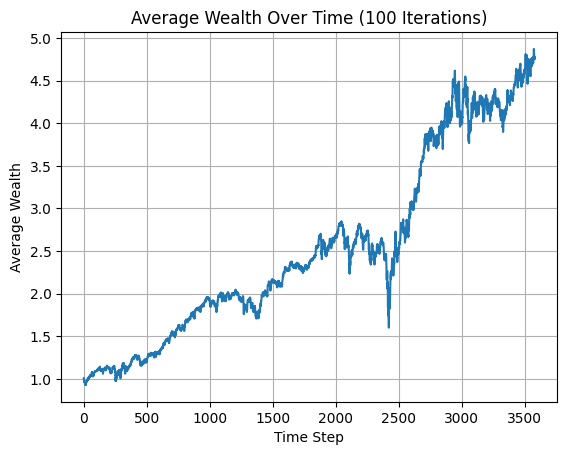

In [146]:
# Initialize parameters
num_iterations = 30
initial_wealth = 1

gamma = 0.8
w = 121
# Create an empty DataFrame to store all wealth matrices for each iteration
all_wealth = pd.DataFrame()

# Repeat the process 100 times
for i in range(num_iterations):
    # Run the Thompson Sampling to get actions, observed rewards, and events
    actions, observed_rewards, eventos = adaptive_discounted_thompson_sampling(returns, gamma, w)
    
    # Convert observed_rewards to a DataFrame
    observed_rewards_df = pd.DataFrame(observed_rewards)
    
    # Create an empty DataFrame to hold the wealth over time for each portfolio
    wealth = pd.DataFrame(index=observed_rewards_df.index, columns=observed_rewards_df.columns)
    
    # Iterate over each portfolio (column)
    for portfolio in observed_rewards_df.columns:
        # Compute cumulative wealth for each portfolio
        wealth[portfolio] = (1 + observed_rewards_df[portfolio]).cumprod() * initial_wealth
    
    # Add the wealth matrix for this iteration to the all_wealth DataFrame
    all_wealth = pd.concat([all_wealth, wealth], axis=1, ignore_index=True)

# Calculate the average wealth per row across all iterations
average_wealth = all_wealth.mean(axis=1)

# Plot the average wealth over time
plt.plot(average_wealth)
plt.title('Average Wealth Over Time (100 Iterations)')
plt.xlabel('Time Step')
plt.ylabel('Average Wealth')
plt.grid(True)
plt.show()
